

---


# importing necessary libraries and Packagaes


In [48]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import re

In [49]:
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns

In [50]:
#loading data
path = "/content/spam.csv"
# path = "/content/spam_ham_dataset.csv"
# path = "/content/SMSSpamCollection.csv"
df = pd.read_csv(path)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."




---


# **EXploratory Data Anyalysis (EDA)**




In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [52]:
#inspecting the data
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [53]:
print(" Total number of rows in the dataset -> ", len(df))

 Total number of rows in the dataset ->  5572


/tmp/ipython-input-850264238.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg = sns.countplot(x= df["Category"], palette= cols)


Text(0, 0.5, 'Number of Data points')

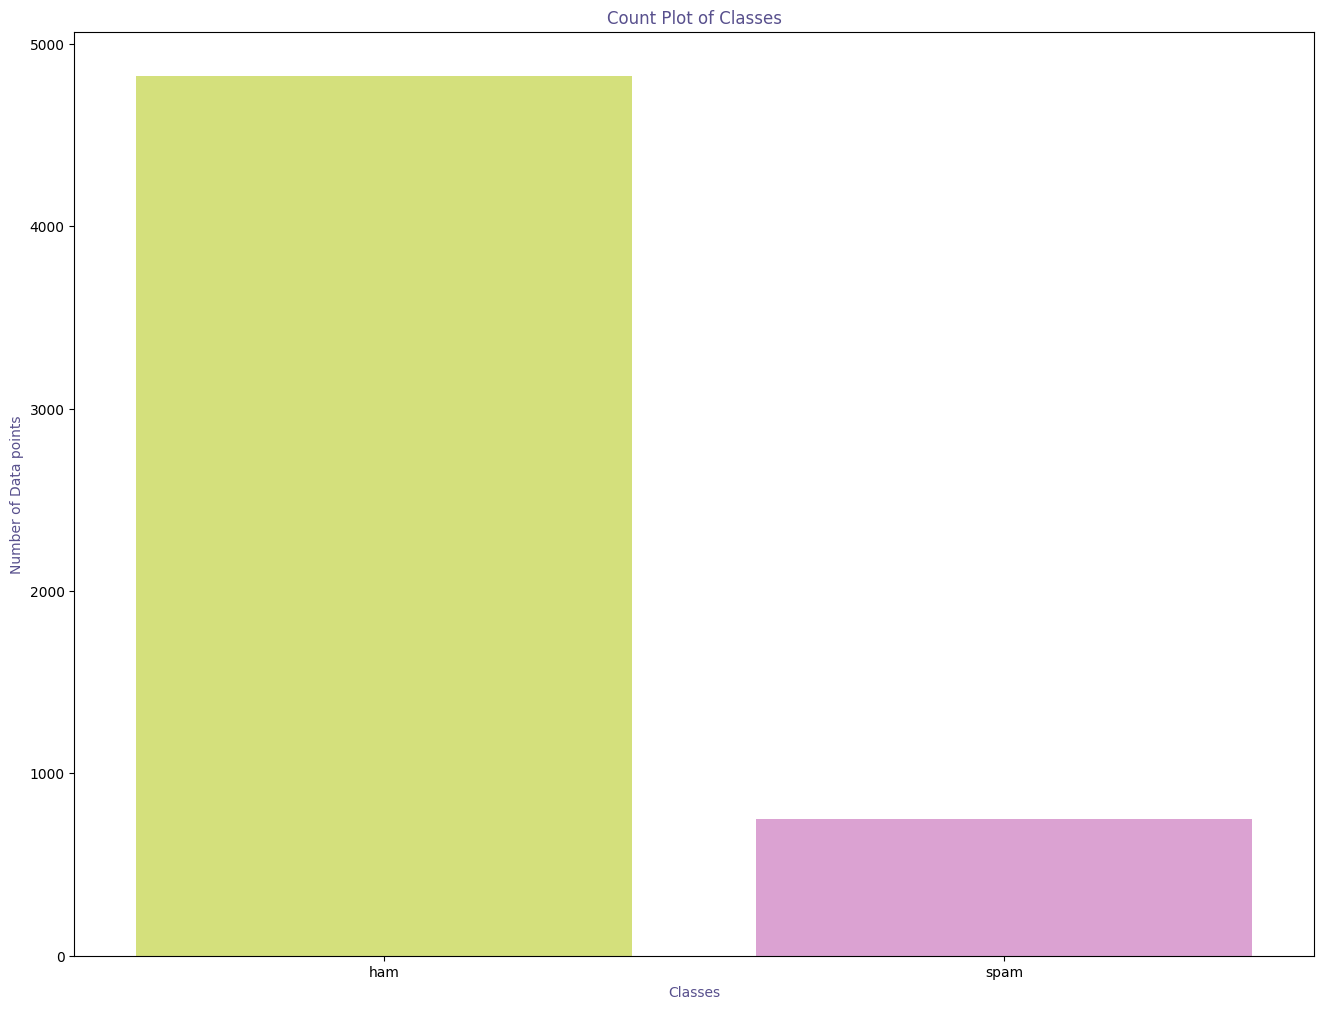

In [54]:
#Palette
cols= ["#E1F16B", "#E598D8"]
#first of all let us evaluate the target and find out if our data is imbalanced or not
plt.figure(figsize=(16,12))
fg = sns.countplot(x= df["Category"], palette= cols)
fg.set_title("Count Plot of Classes", color="#58508d")
fg.set_xlabel("Classes", color="#58508d")
fg.set_ylabel("Number of Data points", color="#58508d")

KeyError: 'Category'

<Figure size 1600x1200 with 0 Axes>

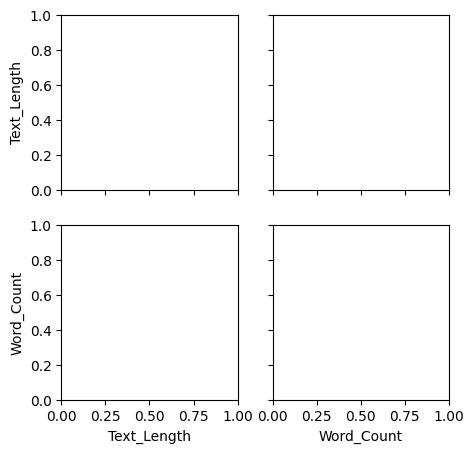



---
# **Data Preprocessing **


---





---


The data has two main columns,


1.   Category(ham/spam)
2.   Message(text).

so, We need to transform each caterogory in either 1(spam) or 0 (ham-not spam).

In [55]:

df['label'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
df.head()


,Category,Message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0




---


# Transoforming and adding some features into numeric form in order to analyze the data better for processing

In [56]:
df["Text_Length"] = df["Message"].apply(len)
df["Word_Count"] = df["Message"].apply(lambda x: len(x.split()))

In [57]:
df_numerics = df[['Text_Length', 'Word_Count']]
df_numerics


,Text_Length,Word_Count
0,111,20
1,29,6
2,155,28
3,49,11
4,61,13
...,...,...
5567,160,30
5568,36,8
5569,57,10
5570,125,26


In [58]:
print(df.columns)



Index(['Category', 'Message', 'label', 'Text_Length', 'Word_Count'], dtype='object')


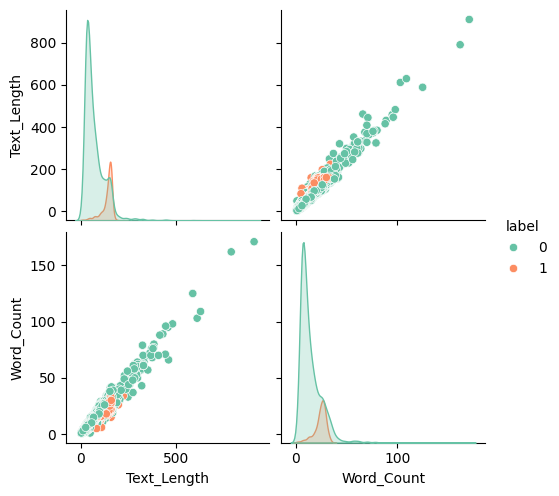

In [59]:
sns.pairplot(df[['Text_Length', 'Word_Count', 'label']], hue="label", palette="Set2")
plt.show()


In [ ]:
#df.drop(['Category'], axis=1, inplace=True)

In [60]:
#Dropping the outliers.
df = df[(df["Text_Length"]<500)]
df.shape

(5566, 5)

In [10]:
df.head()

,Category,Message,label,Text_Length,Word_Count
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,20
1,ham,Ok lar... Joking wif u oni...,0,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,28
3,ham,U dun say so early hor... U c already then say...,0,49,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,13




---


#**Text** cleaning



In [61]:
def Clean_Text(Text):
    sms = re.sub('[^a-zA-Z0-9]', ' ', Text)  # Keep only letters & numbers
    sms = sms.lower()                        # Convert to lowercase
    sms = sms.split()                        # Tokenize (list of words)
    sms = ' '.join(sms)                      # Join back into clean string
    return sms


df['CleanMessage'] = df['Message'].apply(Clean_Text)
# df['Message'] = df['Message'].apply(Clean_Text)
# df['Message'].apply(Clean_Text)


In [62]:
df.head()

,Category,Message,label,Text_Length,Word_Count,CleanMessage
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,20,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,0,29,6,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,28,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,0,49,11,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,13,nah i don t think he goes to usf he lives arou...




---


TF-IDF->
 It’s a way to transform text into
numbers while highlighting important words.

In [63]:
vectorizer=TfidfVectorizer()

In [64]:
vectorizer

TfidfVectorizer()

In [65]:
X = vectorizer.fit_transform(df['CleanMessage'])
y = df['label']

In [66]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 73658 stored elements and shape (5566, 8660)>

In [67]:
y

,label
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0




---


# ***Train test splitting***

---



In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
feature_names = vectorizer.get_feature_names_out()

# Convert to DataFrame
X_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)

print(X_train_df.describe())

                00          000       000pes  008704050406         0089  \
count  3896.000000  3896.000000  3896.000000   3896.000000  3896.000000   
mean      0.000410     0.001065     0.000060      0.000066     0.000064   
std       0.009681     0.014859     0.003735      0.004099     0.004007   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.000000     0.000000   
max       0.239899     0.233521     0.233110      0.255857     0.250140   

              0121  01223585236  01223585334  0125698789           02  ...  \
count  3896.000000       3896.0  3896.000000      3896.0  3896.000000  ...   
mean      0.000078          0.0     0.000058         0.0     0.000376  ...   
std       0.004881          0.0     0.003648         0.0     0.009569  ...   
min       0.



---

# **Fitting transformed data into Models**

---



In [69]:
modelNB = MultinomialNB()
modelNB.fit(X_train, y_train)

MultinomialNB()

## Prediction of model with test data

In [70]:
y_pred = modelNB.predict(X_test)

In [71]:
emails = ["Hey you are good, wanna go for ride?", "Win a free lottery now!"]
emails_tf = vectorizer.transform(emails)
predictions = modelNB.predict(emails_tf)
print(predictions)


[0 1]


# Printing model accuracy over test data

In [72]:
print("Accuracy",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy 0.9556886227544911
Confusion Matrix:
 [[1453    0]
 [  74  143]]


In [73]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      1453
           1       1.00      0.66      0.79       217

    accuracy                           0.96      1670
   macro avg       0.98      0.83      0.88      1670
weighted avg       0.96      0.96      0.95      1670





---


# Now, Using logistic regressionto analyze performance for different model.



In [ ]:
# Train logistic regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)

In [75]:
# Metrics
print("\n=== Logistic Regression ===")

print("Accuracy:", accuracy_score(y_test, logreg_pred))
print("\nClassification Report:\n", classification_report(y_test, logreg_pred))


=== Logistic Regression ===
Accuracy: 0.9568862275449102

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      1453
           1       0.99      0.67      0.80       217

    accuracy                           0.96      1670
   macro avg       0.97      0.84      0.89      1670
weighted avg       0.96      0.96      0.95      1670



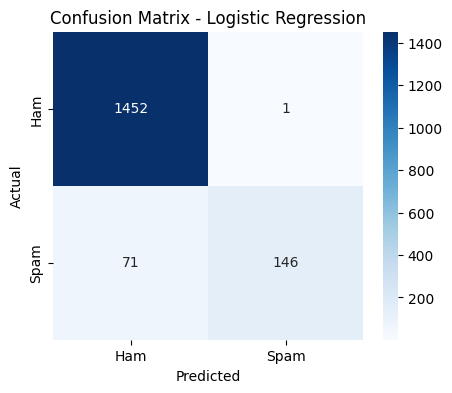

In [38]:
# Confusion Matrix
cm = confusion_matrix(y_test, logreg_pred)
plt.figure(figsize=(5,4))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Random Forest Classifier

In [76]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [77]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [78]:
y_pred_rf = rf_model.predict(X_test)

In [79]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.9718562874251497
Confusion Matrix:
 [[1453    0]
 [  47  170]]


# Support Vector Machine (SVM) calssifier

---







In [43]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [44]:
y_pred_svm = svm_model.predict(X_test)

In [45]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.9784431137724551
Confusion Matrix:
 [[1451    2]
 [  34  183]]


In [80]:
#Testting with new unseen data
spamSMS = ["Congratulations! You have won a $1000 Walmart gift card. Click here to claim now!"]
spamV = vectorizer.transform(spamSMS)
print(svm_model.predict(spamV))


[1]
